In [1]:

def find_most_correlated(data):
    n = data.shape[1]
    keys = data.keys()
    pair = []
    max_value = 0
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = np.corrcoef(S1, S2)[0,1]
            if result > max_value:
                pair = (keys[i], keys[j])
                max_value = result
    return pair, max_value

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
A = np.random.rand(100)
B = -3 * A + np.random.exponential(0.05, 100)

print(np.var(A))
print(np.var(B))

print(np.cov(A,B)[0,1])
print(np.corrcoef(A,B)[0,1])

0.08033565057358874
0.7265389684788353
-0.24365365917615645
-0.998445855453552


0.08019406659133611
0.20138339980969883
-0.0014641945491570651
-0.011406463830760423


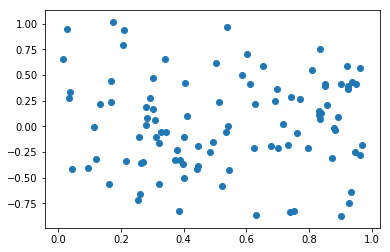

In [8]:
C = np.random.rand(100)
D = np.random.normal(0,0.5,100)

print(np.var(C))
print(np.var(D))

print(np.cov(C,D)[0,1])
print(np.corrcoef(C,D)[0,1])

plt.scatter(C,D)

[[1.         0.98961628]
 [0.98961628 1.        ]]


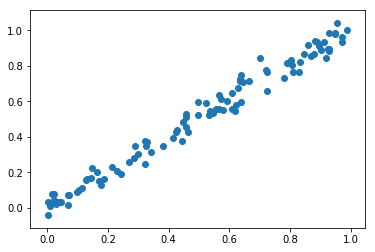

In [16]:
X = np.random.rand(100)
Y =  X + np.random.normal(0,0.05,100)
print(np.corrcoef(X,Y))
plt.scatter(X,Y)

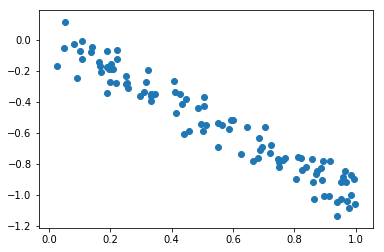

In [25]:
Z = np.random.rand(100)
W = -Z + np.random.normal(0,0.09,100)

np.corrcoef(Z,W)
plt.scatter(Z,W)

In [26]:
import scipy.stats as stats
import numpy as np

!pip install pandas-datareader
from datetime import datetime
import pandas_datareader as pdr

In [30]:
OKE =  pdr.data.DataReader('OKE', data_source='yahoo', start=datetime(2013,1,1), end=datetime(2015,1,1)).iloc[:, -1]
LAKE =  pdr.data.DataReader('LAKE', data_source='yahoo', start=datetime(2013,1,1), end=datetime(2015,1,1)).iloc[:, -1]
SPY =  pdr.data.DataReader('SPY', data_source='yahoo', start=datetime(2013,1,1), end=datetime(2015,1,1)).iloc[:, -1]

print(np.corrcoef(OKE, LAKE)[0,1])
print(np.corrcoef(OKE, SPY)[0,1])
print(np.corrcoef(LAKE, SPY)[0,1])

0.446398010200717
0.8548212659756768
0.624827635918209


(('FB', 'AMZN'), 0.9575381882468288)


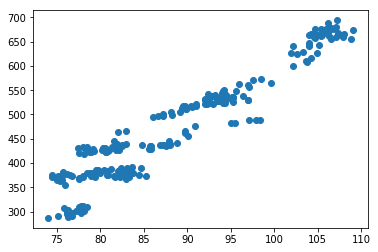

In [34]:
GSK =  pdr.data.DataReader('GSK', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2016,1,1)).iloc[:, -1]
GOOG =  pdr.data.DataReader('GOOG', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2016,1,1)).iloc[:, -1]
FB =  pdr.data.DataReader('FB', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2016,1,1)).iloc[:, -1]
AZO =  pdr.data.DataReader('AZO', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2016,1,1)).iloc[:, -1]
XEC =  pdr.data.DataReader('XEC', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2016,1,1)).iloc[:, -1]
AMZN =  pdr.data.DataReader('AMZN', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2016,1,1)).iloc[:, -1]

data = pd.concat([GSK,GOOG,FB,AZO,XEC,AMZN], axis=1)
data.columns=['GSK','GOOG','FB','AZO','XEC','AMZN']

print(find_most_correlated(data))

plt.scatter(FB, AMZN)

In [35]:
FB_15 =  pdr.data.DataReader('FB', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2016,1,1)).iloc[:, -1]
AMZN_15 =  pdr.data.DataReader('AMZN', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2016,1,1)).iloc[:, -1]
FB_16 =  pdr.data.DataReader('FB', data_source='yahoo', start=datetime(2016,1,1), end=datetime(2016,7,1)).iloc[:, -1]
AMZN_16 =  pdr.data.DataReader('AMZN', data_source='yahoo', start=datetime(2016,1,1), end=datetime(2016,7,1)).iloc[:, -1]

print(np.corrcoef(FB_15, AMZN_15)[0,1])
print(np.corrcoef(FB_16, AMZN_16)[0,1])

0.9575381882468288
0.6510175186611807


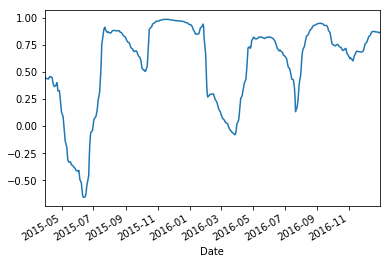

In [39]:
FB =  pdr.data.DataReader('FB', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2017,1,1)).iloc[:, -1]
AMZN =  pdr.data.DataReader('AMZN', data_source='yahoo', start=datetime(2015,1,1), end=datetime(2017,1,1)).iloc[:, -1]

rolling_corr = FB.rolling(60).corr(AMZN)
rolling_corr = rolling_corr.dropna()

rolling_corr.plot()